## Filter Comparison

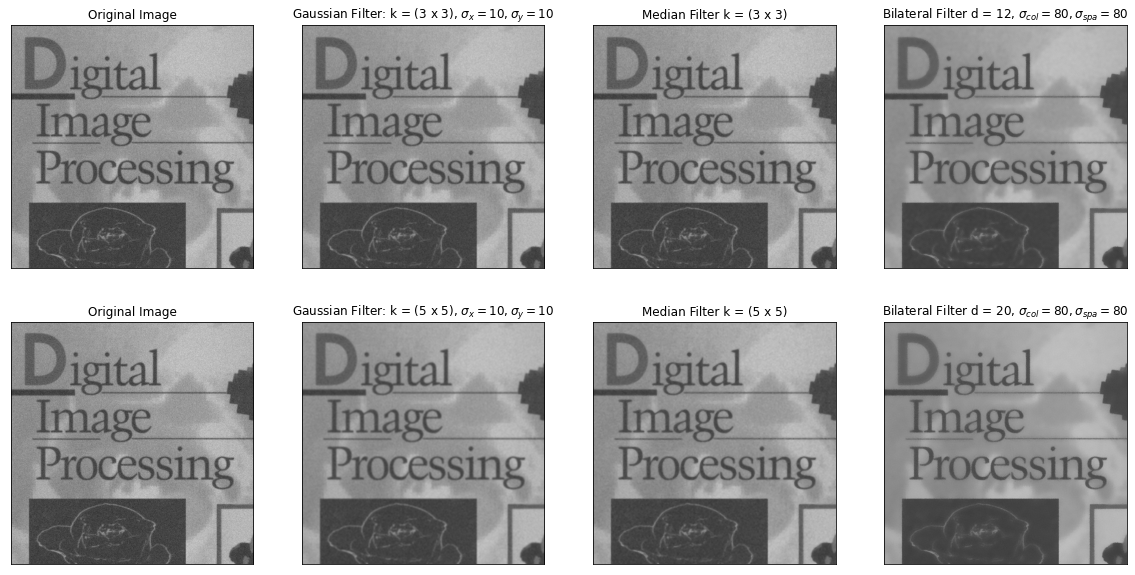

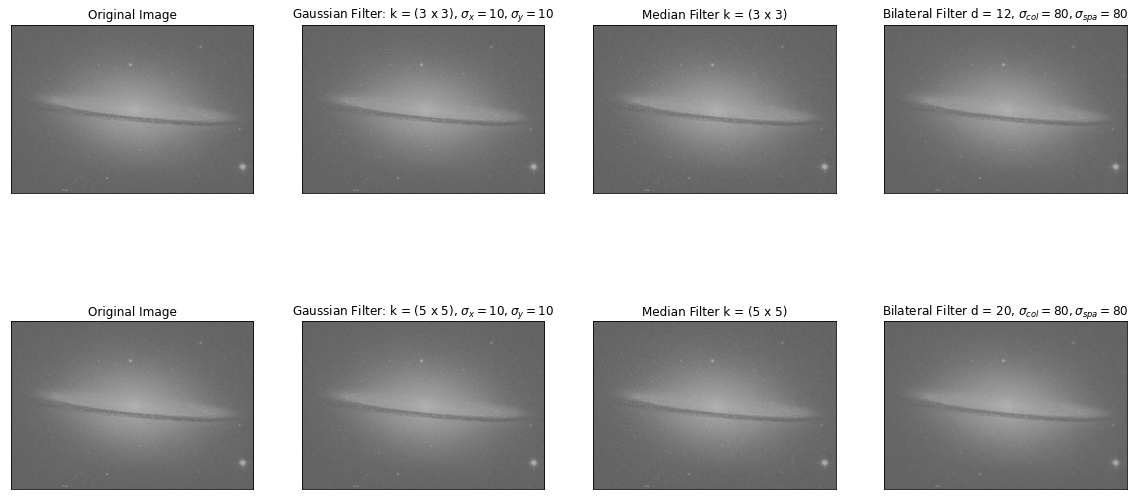

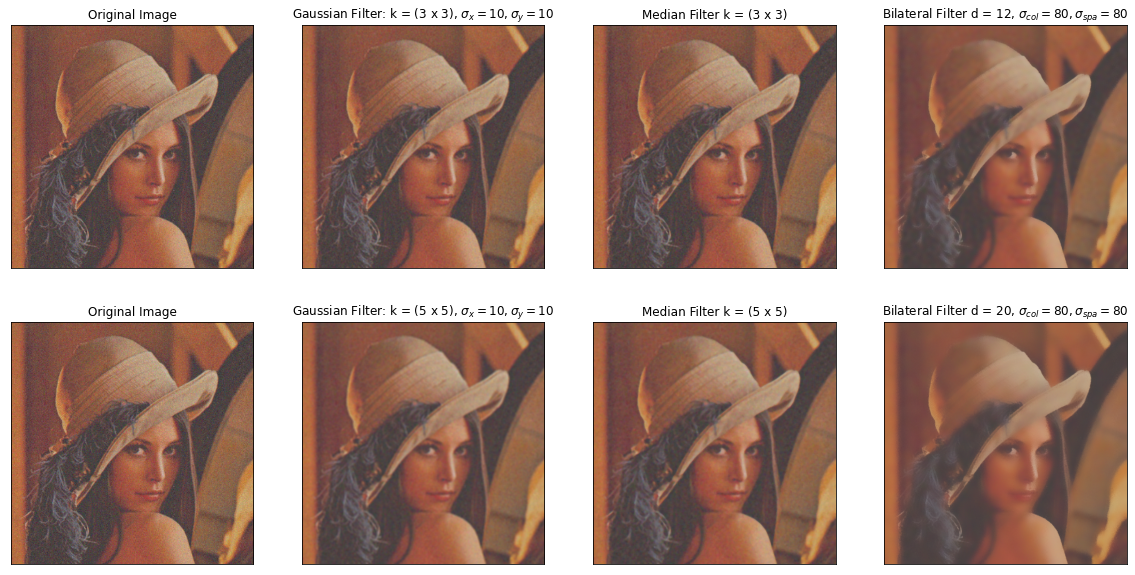

In [1]:
##########################################################################################
# Primary Contact    : v_s191@txstate.edu; vittal.siddaiah@gmail.com;
##########################################################################################
#Filter Comparison
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
##############################################################################################

##############################################################################################
def Render(imageData, figId, title):
    plt.subplot(figId)
    plt.imshow(imageData[..., ::-1]); 
    plt.xticks([]), plt.yticks([]); 
    plt.title(title)
    return
##############################################################################################
def CompareFilters(rawImageData, trials):
    ##############################################################################
    # Generating FigureId's
    figIds = []
    rows = len(trials)
    cols = 4
    total = rows * cols
    
    counter = 1
    for row in range(rows):
        for col in range(cols):
            figIds.append(rows*100 + cols*10 + counter) 
            counter += 1
    ##############################################################################
    
    counter = 0

    for trial in trials:
        ##############################################################################
        kernelSize = trial[0]
        diameter = trial[0] * 4
        sigmaX = trial[1]
        sigmaColor = trial[1] * 8
        sigmaY = trial[2]
        sigmaSpace = trial[2] * 8
        ##############################################################################
        strKernel = "Original Image"
        resultImageData = rawImageData
        Render(resultImageData, figIds[counter], strKernel)
        counter += 1
        ##############################################################################

        ##############################################################################
        strKernel = r"Gaussian Filter: k = (%d x %d), $\sigma_x =%d,  \sigma_y =%d$" % (kernelSize, kernelSize,sigmaX,sigmaY)
        resultImageData = cv2.GaussianBlur(imageData,(kernelSize,kernelSize),sigmaX,sigmaY)
        Render(resultImageData, figIds[counter], strKernel)
        counter += 1
        ##############################################################################

        ##############################################################################
        strKernel = r"Median Filter k = (%d x %d)" % (kernelSize, kernelSize)
        resultImageData = cv2.medianBlur(imageData,kernelSize)
        Render(resultImageData, figIds[counter], strKernel)
        counter += 1
        ##############################################################################
        
        ##############################################################################
        strKernel = r"Bilateral Filter d = %d, $\sigma_{col} = %d, \sigma_{spa} = %d$" % (diameter, sigmaColor, sigmaSpace)
        resultImageData = cv2.bilateralFilter(imageData, diameter, sigmaColor, sigmaSpace)
        Render(resultImageData, figIds[counter], strKernel)
        counter += 1
        ##############################################################################

    return 

##############################################################################################

##############################################################################################  
# Design of Experiment
##############################################################################################  
#trial = [kernelSize, sigmaX, sigmaY]
trial1 = [ 3, 10, 10] 
trial2 = [ 5, 10, 10] 
trial3 = [ 3, 40, 40] 
trial4 = [ 5, 50, 50] 
##############################################################################################

##############################################################################################
# Reading the Image
imageData = cv2.imread("../../../Images/book-cover-gaussian.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")
##############################################################################################
plt.figure(figsize=[20,10])
CompareFilters(imageData, [trial1, trial2])  ## Do not plot more than 2 trials at a time limitation in jupyter-notebook display
#plt.figure(figsize=[20,10])
#CompareFilters(imageData, [trial3, trial4])  ## Do not plot more than 2 trials at a time limitation in jupyter-notebook display
##############################################################################################


##############################################################################################
# Reading the Image
imageData = cv2.imread("../../../Images/sombrero-galaxy-noisy.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")
##############################################################################################
plt.figure(figsize=[20,10])
CompareFilters(imageData, [trial1, trial2])  ## Do not plot more than 2 trials at a time limitation in jupyter-notebook display
#plt.figure(figsize=[20,10])
#CompareFilters(imageData, [trial3, trial4])  ## Do not plot more than 2 trials at a time limitation in jupyter-notebook display
##############################################################################################


##############################################################################################
# Reading the Image
imageData = cv2.imread("../../../Images/lenna-noise.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")
##############################################################################################
plt.figure(figsize=[20,10])
CompareFilters(imageData, [trial1, trial2])  ## Do not plot more than 2 trials at a time limitation in jupyter-notebook display
#plt.figure(figsize=[20,10])
#CompareFilters(imageData, [trial3, trial4])  ## Do not plot more than 2 trials at a time limitation in jupyter-notebook display
##############################################################################################


